### Model LDA dan LSA Pemilu

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('filtered_online_news_pemilu1.csv')
data.head(5)

,title,content,tanggal_berita,content_clean,link_berita,asal_berita,sentimen
0,Megawati: Membangun Indonesia Tak Bisa Hanya d...,"Ketua Umum PDIP, Megawati Soekarnoputri menyeb...",2023-10-01,ketua umum pdip megawati soekarnoputri menyebu...,https://www.cnnindonesia.com/nasional/20231001...,CNN News,positif
1,KPK Soal MA Cabut Aturan Koruptor Nyaleg: Biar...,Komisi Pemberantasan Korupsi (KPK) mengapresia...,2023-10-01,komisi pemberantasan korupsi kpk mengapresiasi...,https://www.cnnindonesia.com/nasional/20231001...,CNN News,negatif
2,Indikator: Ganjar dan Erick Thohir Capres-Cawa...,Hasil survei Indikator Politik Indonesia menun...,2023-10-01,hasil survei indikator politik indonesia ganja...,https://www.cnnindonesia.com/nasional/20231001...,CNN News,positif
3,Hasto Respons Usulan Guntur Sukarno Sebut Joko...,Sekretaris Jenderal PDIP Hasto Kristiyanto buk...,2023-10-01,sekretaris jenderal pdip hasto kristiyanto buk...,https://www.cnnindonesia.com/nasional/20231001...,CNN News,positif
4,"Heran Ada Isu Prabowo Duet dengan Ganjar, Mega...","JAKARTA, KOMPAS.com - Ketua Umum PDI Perjuanga...",2023-10-01,ketua umum pdi perjuangan megawati soekarnoput...,https://nasional.kompas.com/read/2023/10/01/14...,Kompas News,negatif


In [3]:
len(data)

30462

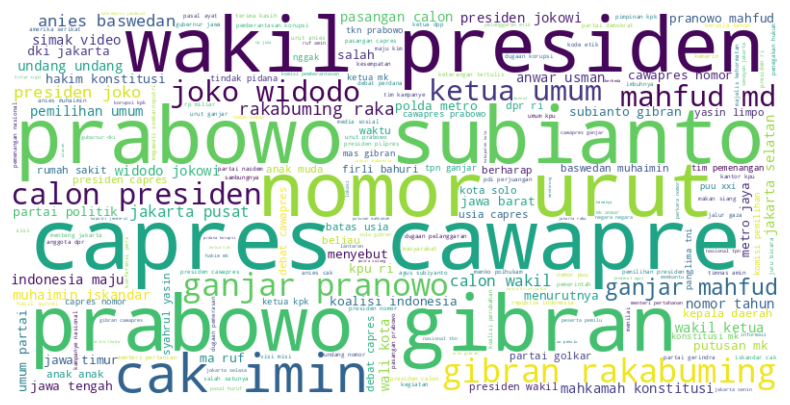

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all texts into one string
all_texts = ' '.join(data['content_clean'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_texts)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## LDA

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Membuat objek TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1,
                             norm='l2',
                             smooth_idf=True,
                             use_idf=True,
                             ngram_range=(1,2))

In [6]:
# Mengubah teks menjadi representasi vektor
X = vectorizer.fit_transform(data['content_clean'])

# Membuat model LDA dengan 10 topik
num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

In [7]:
# Melatih model LDA
lda_model.fit(X)

# Mendapatkan kata-kata kunci untuk setiap topik
feature_names = vectorizer.get_feature_names_out()

top_n_words = 5  # Jumlah kata kunci untuk setiap topik
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topik {topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[:-top_n_words - 1:-1]])

Topik 1:
['israel', 'gaza', 'palestina', 'hamas', 'serangan']
Topik 2:
['prabowo', 'kpk', 'gibran', 'jokowi', 'partai']
Topik 3:
['debat', 'segmen', 'debat capres', 'debat cawapres', 'gazalba']
Topik 4:
['doni', 'sorong', 'monardo', 'doni monardo', 'pakta']
Topik 5:
['rocky', 'depok', 'taipei', 'pmt', 'mary']
Topik 6:
['admm', 'jaki', 'karen', 'rafael alun', 'argo']
Topik 7:
['doni', 'ghisca', 'tiket', 'monardo', 'doni monardo']
Topik 8:
['ganjar', 'gibran', 'mahfud', 'survei', 'prabowo']
Topik 9:
['mk', 'putusan', 'pemilu', 'tni', 'tahun']
Topik 10:
['ijtima ulama', 'ijtima', 'jumat curhat', 'pakta integritas', 'pakta']


#### Visualasi

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.manifold import MDS


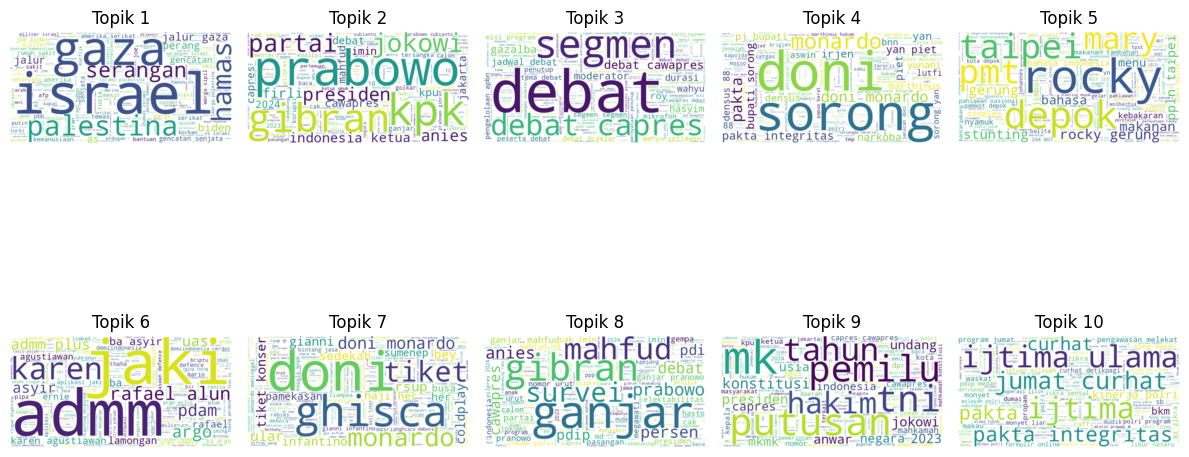

In [9]:
# Word Cloud
plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(feature_names, lda_model.components_[i])))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


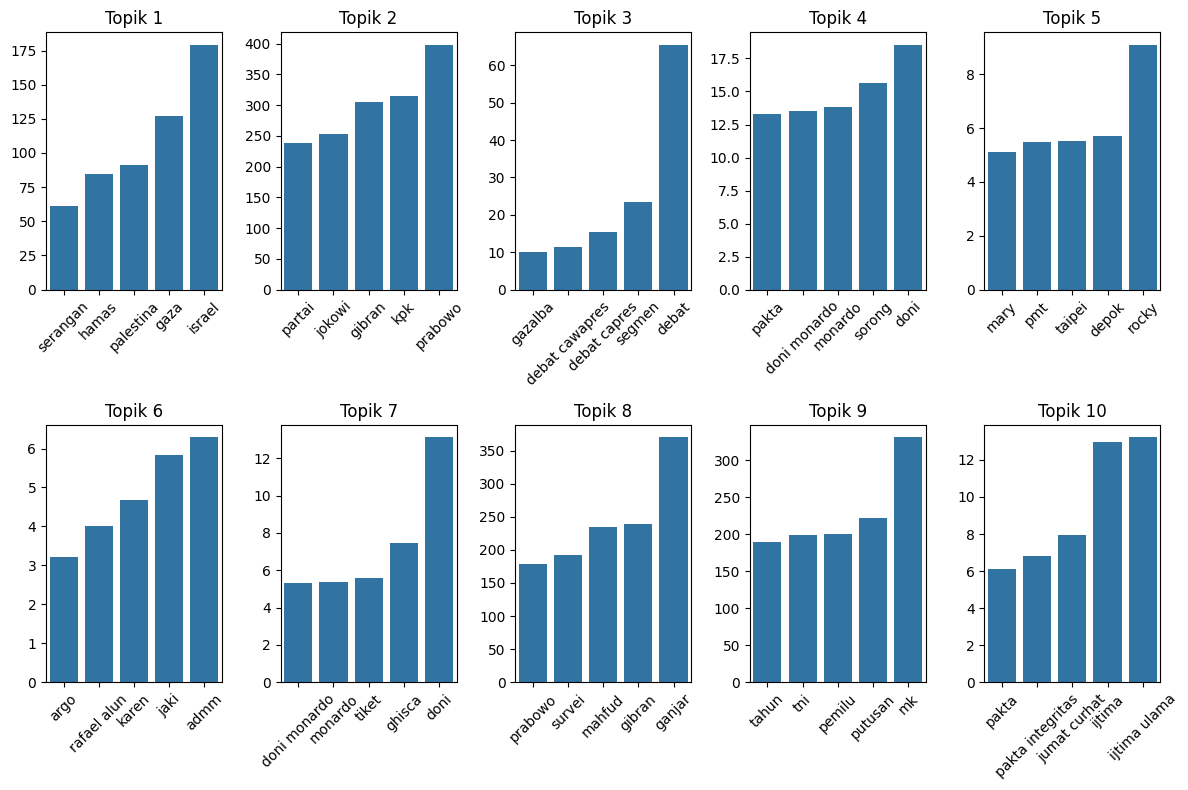

In [10]:
# Bar Plot
plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    sns.barplot(x=[feature_names[j] for j in lda_model.components_[i].argsort()[-top_n_words:]], y=lda_model.components_[i][lda_model.components_[i].argsort()[-top_n_words:]])
    plt.title(f'Topik {i+1}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## LSA 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Membuat vektor TF-IDF
vectorizer = TfidfVectorizer(min_df=1,
                             norm='l2',
                             smooth_idf=True,
                             use_idf=True,
                             ngram_range=(1,2))
X = vectorizer.fit_transform(data['content_clean'])

# Membuat model LSA dengan 10 topik
lsa_model = TruncatedSVD(n_components=10)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Menampilkan kata-kata teratas untuk setiap topik
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa_model.components_):
    top_terms = [terms[j] for j in topic.argsort()[-5:]]
    print(f"Topik {i+1}: {', '.join(top_terms)}")


Topik 1: presiden, cawapres, ganjar, prabowo, gibran
Topik 2: anwar, mkmk, hakim, putusan, mk
Topik 3: bahuri, syahrul, tersangka, firli, kpk
Topik 4: cak imin, imin, anies, kpu, debat
Topik 5: anies, palestina, ganjar, gaza, israel
Topik 6: hamas, palestina, gaza, israel, debat
Topik 7: israel, anies, cak, cak imin, imin
Topik 8: cak, cak imin, imin, agus, tni
Topik 9: elektabilitas, agus, tni, persen, survei
Topik 10: bmkg, undang, kpu, pemilu, gempa


#### Visualasi

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

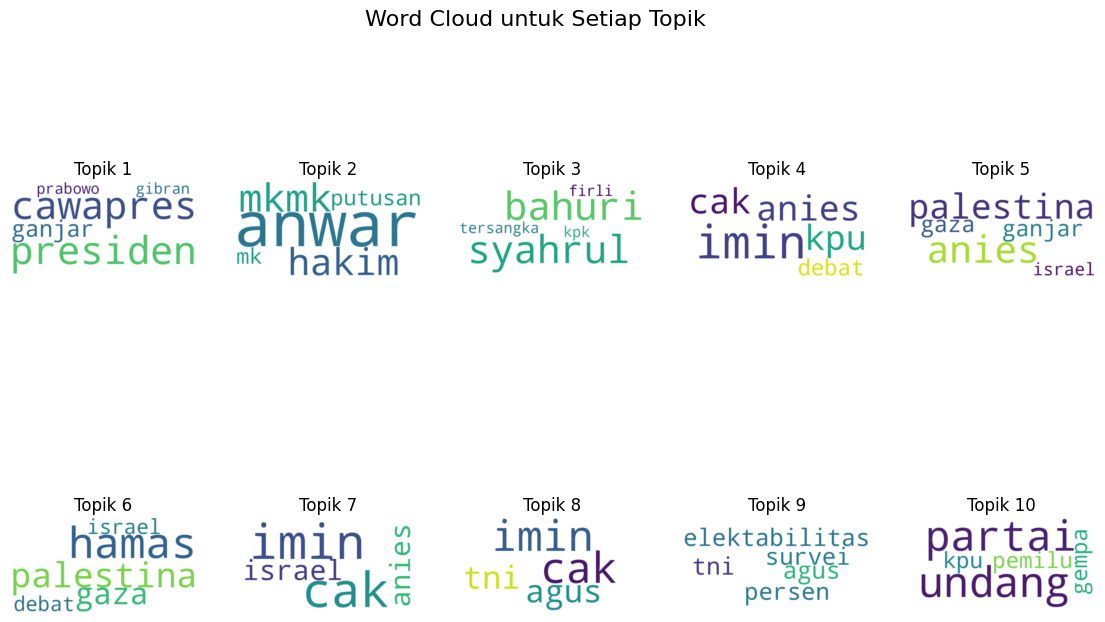

In [13]:
# Membuat model LSA dengan 10 topik
lsa_model = TruncatedSVD(n_components=10)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Mendapatkan kata-kata teratas untuk setiap topik
terms = vectorizer.get_feature_names_out()
top_terms_per_topic = []
for topic in lsa_model.components_:
    top_terms = [terms[j] for j in topic.argsort()[-5:]]
    top_terms_per_topic.append(top_terms)

# Word Cloud
plt.figure(figsize=(14, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_terms_per_topic[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')
plt.suptitle('Word Cloud untuk Setiap Topik', fontsize=16)
plt.show()

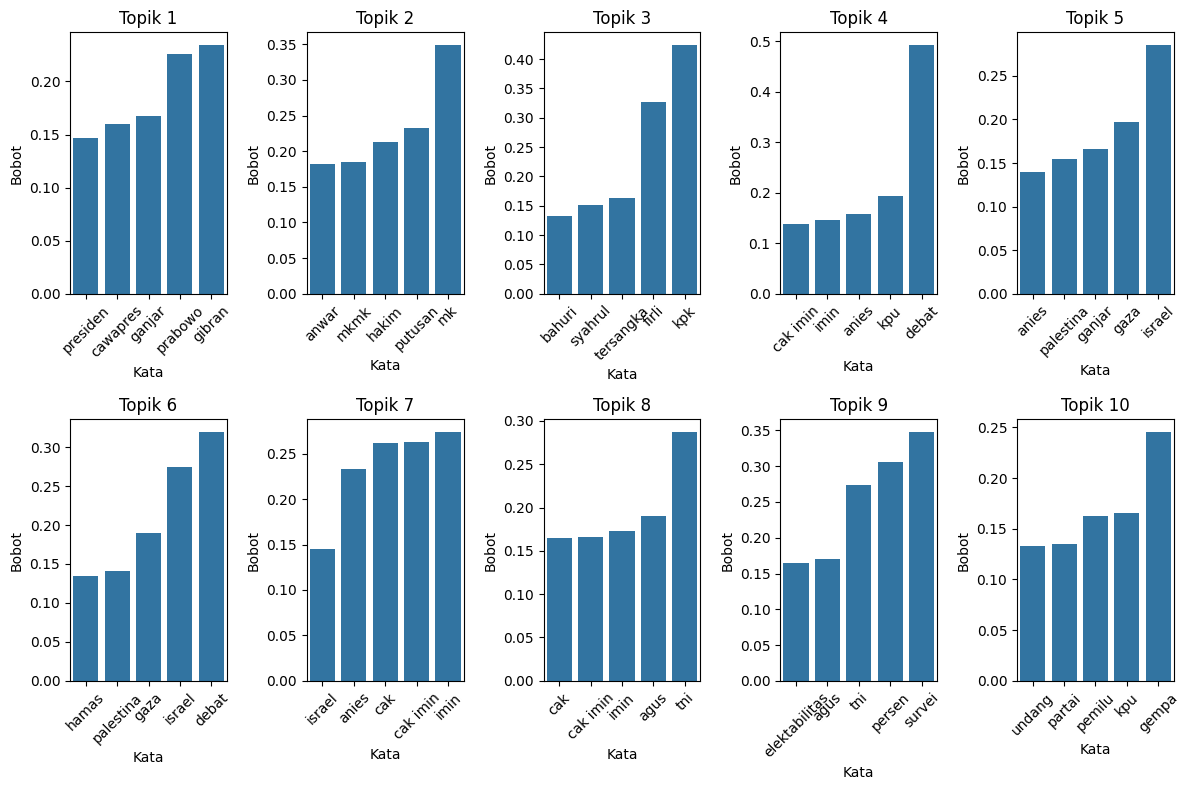

In [14]:
# Bar Plot Topik Kata untuk LSA
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    top_terms = [terms[j] for j in lsa_model.components_[i].argsort()[-5:]]
    top_weights = sorted(lsa_model.components_[i])[-5:]
    sns.barplot(x=top_terms, y=top_weights)
    plt.title(f'Topik {i+1}')
    plt.xlabel('Kata')
    plt.ylabel('Bobot')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
